In [145]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
sns.set()
# Access data.
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
uploaded = files.upload()

Saving rawdata.csv to rawdata (1).csv


In [0]:
import io
icudata = pd.read_csv(io.BytesIO(uploaded['rawdata.csv']))

In [147]:
icudata

,age,height,weight,eyes,motor,verbal,GCSTotal,temperature,respiratoryrate,heartrate,glucose,O2,fio2,ph,los,SBP,DBP,MAP,ethnicity,gender,hosp_alive,icu_alive
0,81.0,165.1,61.70,4.0,6.0,5.0,15.0,34.8,5.0,114.0,185.0,95.0,60.0,7.390,10.893056,103.366634,55.650501,71.555879,1.0,1,0,0
1,59.0,180.3,92.30,4.0,6.0,5.0,15.0,37.2,10.0,114.0,121.0,98.0,21.0,6.700,10.679861,132.334862,57.155963,82.215596,1.0,0,0,0
2,80.0,170.2,103.30,4.0,6.0,5.0,15.0,36.6,55.0,102.0,273.0,97.0,21.0,6.700,3.610417,112.200000,59.900000,77.333333,1.0,0,0,0
3,63.0,183.0,118.00,4.0,6.0,5.0,15.0,37.3,26.0,100.0,143.0,97.0,60.0,7.450,2.949306,128.652968,60.463470,83.193303,1.0,0,0,0
4,60.0,165.1,79.90,4.0,6.0,4.0,14.0,34.5,37.0,137.0,273.0,99.0,40.0,7.070,3.611806,117.556477,62.197927,80.650777,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,51.0,180.3,59.00,4.0,6.0,3.0,13.0,34.5,26.0,56.0,192.0,92.0,100.0,7.444,11.053472,130.552042,67.630504,88.604350,3.0,0,0,0
17889,51.0,170.2,63.05,1.0,1.0,1.0,3.0,34.5,33.0,86.0,273.0,88.0,100.0,7.404,2.611111,115.167622,61.166189,79.166667,0.0,1,1,1
17890,66.0,157.5,71.50,4.0,6.0,3.0,13.0,35.8,50.0,115.0,209.0,81.0,100.0,7.494,29.383333,122.685241,49.463950,73.871047,1.0,1,0,0
17891,50.0,165.1,59.00,1.0,5.0,1.0,7.0,34.9,14.0,62.0,182.0,97.0,100.0,7.185,2.145833,134.452465,77.519366,96.497066,3.0,1,0,0


In [148]:
icudata = icudata.dropna()
icudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17764 entries, 0 to 17892
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              17764 non-null  float64
 1   height           17764 non-null  float64
 2   weight           17764 non-null  float64
 3   eyes             17764 non-null  float64
 4   motor            17764 non-null  float64
 5   verbal           17764 non-null  float64
 6   GCSTotal         17764 non-null  float64
 7   temperature      17764 non-null  float64
 8   respiratoryrate  17764 non-null  float64
 9   heartrate        17764 non-null  float64
 10  glucose          17764 non-null  float64
 11  O2               17764 non-null  float64
 12  fio2             17764 non-null  float64
 13  ph               17764 non-null  float64
 14  los              17764 non-null  float64
 15  SBP              17764 non-null  float64
 16  DBP              17764 non-null  float64
 17  MAP         

In [0]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)


## Normalisation

In [0]:
mu = x_train.mean()
std = x_train.std()    #
x_train = (x_train - mu)/std
x_test = (x_test - mu)/std

## Applying model

In [0]:
model = LogisticRegression()

# Start the model fitting process
model.fit(x_train, y_train)

# Run inference on trained model
predictions = model.predict(x_test)

# Get model accuracy
acc = model.score(x_test, y_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
p = metrics.precision_score(y_test, predictions)
r = metrics.recall_score(y_test, predictions)

In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)

In [154]:
print('*'*30)
print(f'Logistic Regression results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Logistic Regression results: 

	 Acc = 0.846 
	 Precision=0.571 
	 Recall=0.158 
	 F1=0.247 
	 AUC=0.568 
	


## Visualisation

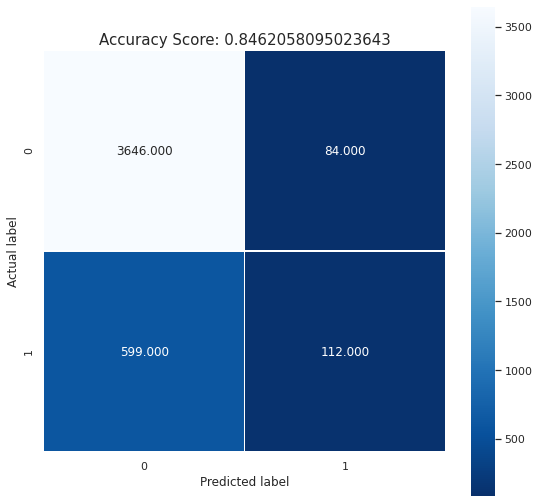

In [155]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## ROC curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.568')

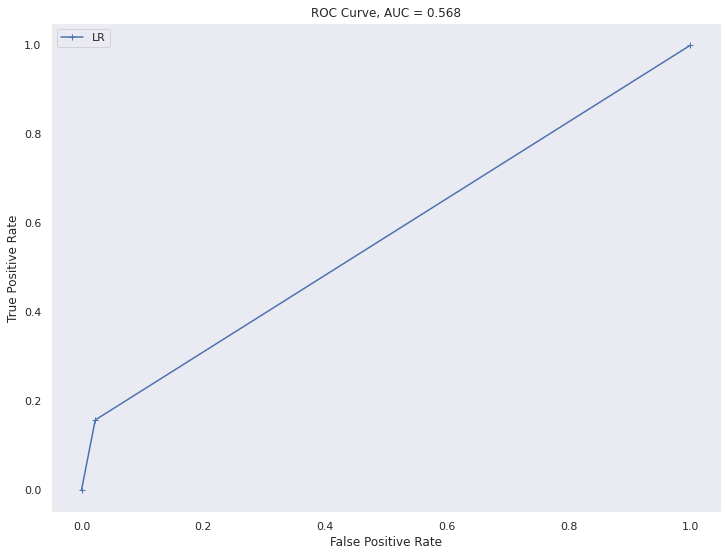

In [156]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

## Visualize precision-recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

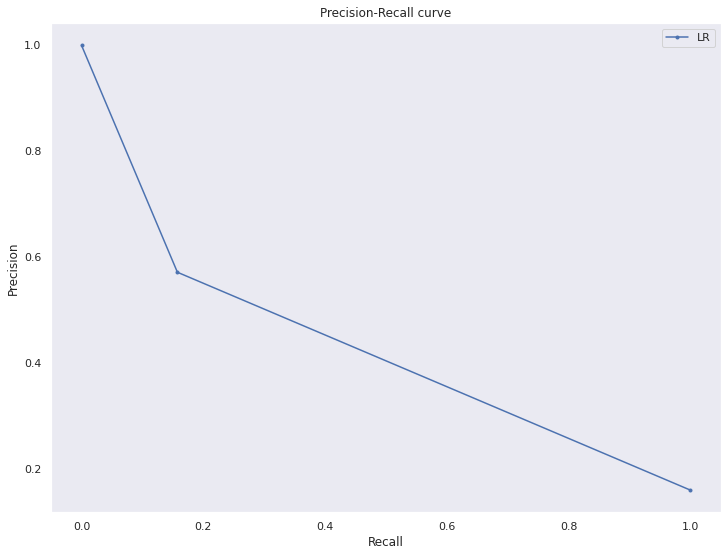

In [157]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Oversampling

In [158]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Normalisation using sklearn

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:

model.fit(x_train, y_train)
predictions = model.predict(x_test)
acc = model.score(x_test, y_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
p = metrics.precision_score(y_test, predictions)
r = metrics.recall_score(y_test, predictions)

In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)


In [163]:
print('*'*30)
print(f'Logistic Regression results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Logistic Regression results: 

	 Acc = 0.711 
	 Precision=0.712 
	 Recall=0.708 
	 F1=0.710 
	 AUC=0.711 
	


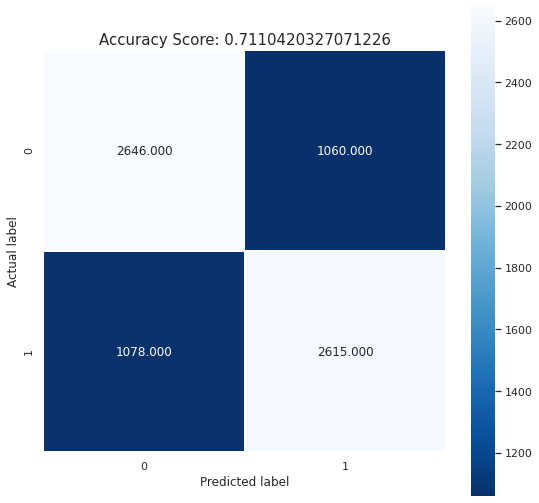

In [164]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.711')

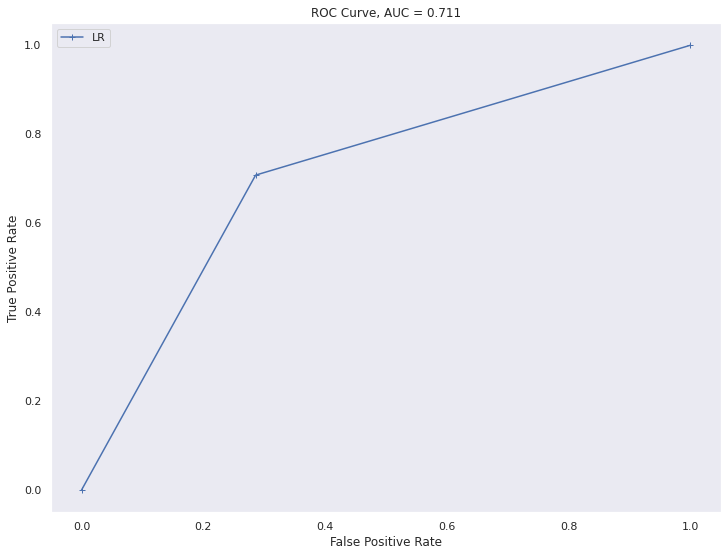

In [165]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

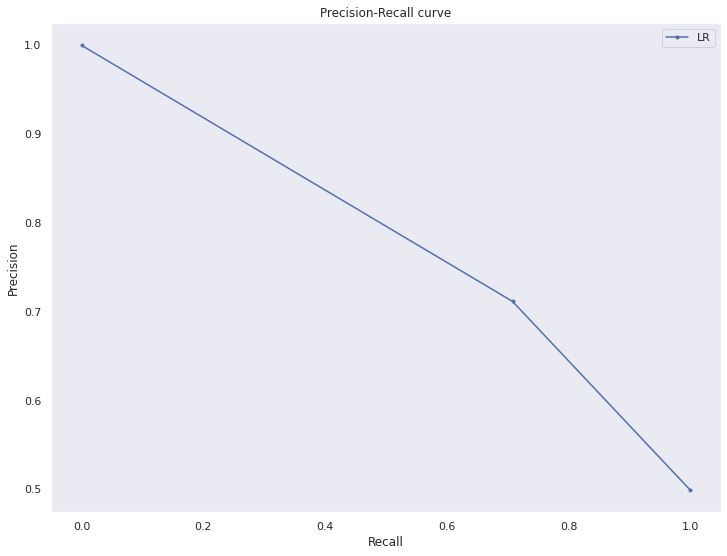

In [166]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## SVM

In [0]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)


In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
modelsvm = SVC(kernel='linear',class_weight='balanced',probability=True)
modelsvm.fit(x_train,y_train)
predictions = modelsvm.predict(x_test)
acc = modelsvm.score(x_test, y_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
p = metrics.precision_score(y_test, predictions)
r = metrics.recall_score(y_test, predictions)

In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)


In [172]:
print('*'*30)
print(f'Support Vector Machine results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Support Vector Machine results: 

	 Acc = 0.705 
	 Precision=0.311 
	 Recall=0.691 
	 F1=0.428 
	 AUC=0.699 
	


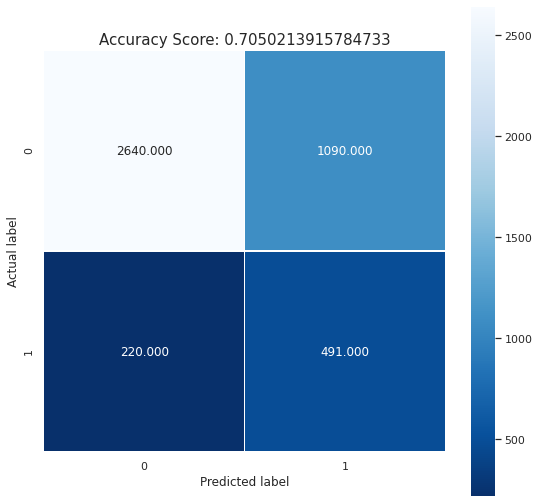

In [173]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.699')

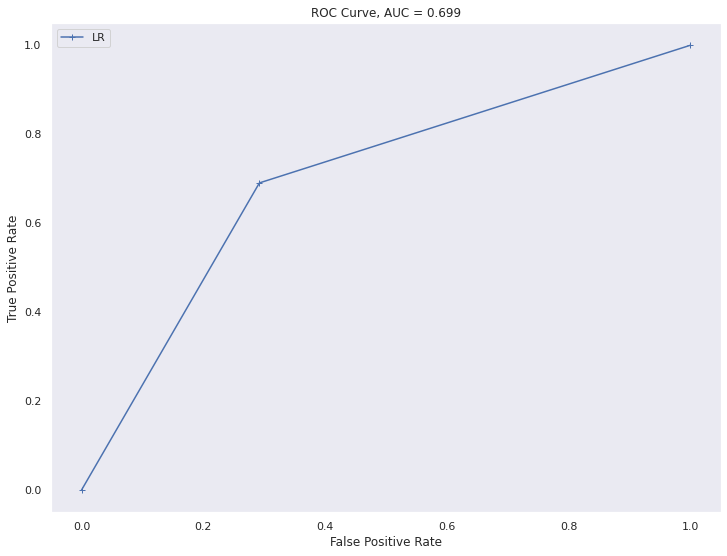

In [174]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

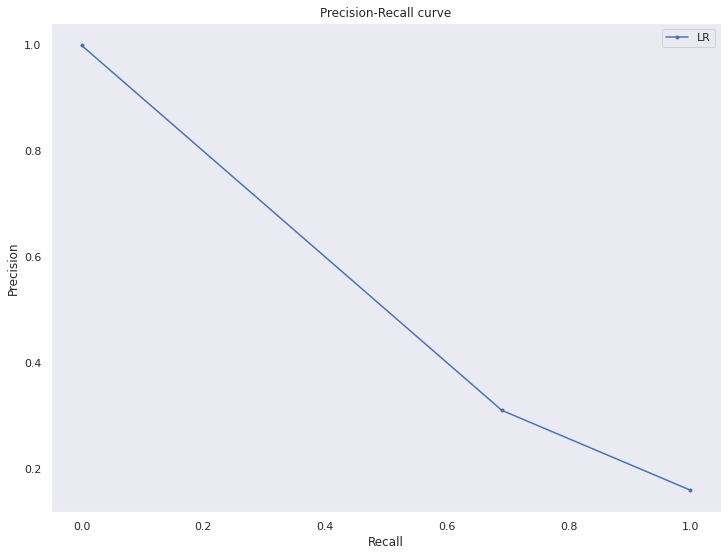

In [175]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Random Forest

In [176]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [178]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rfmodel.predict(x_test)
acc = rfmodel.score(x_test, y_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
p = metrics.precision_score(y_test, predictions)
r = metrics.recall_score(y_test, predictions)

In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)

In [182]:
print('*'*30)
print(f'Support Vector Machine results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Support Vector Machine results: 

	 Acc = 0.405 
	 Precision=0.383 
	 Recall=0.314 
	 F1=0.345 
	 AUC=0.404 
	


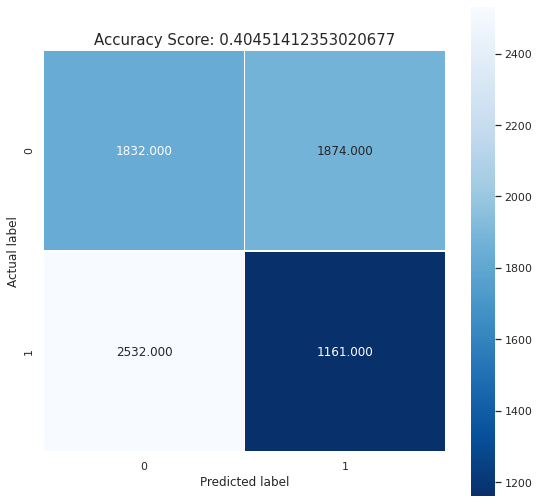

In [183]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.404')

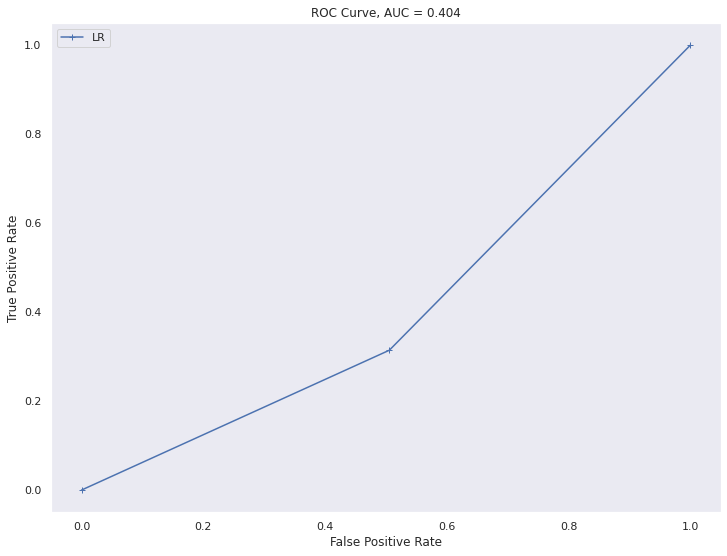

In [184]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

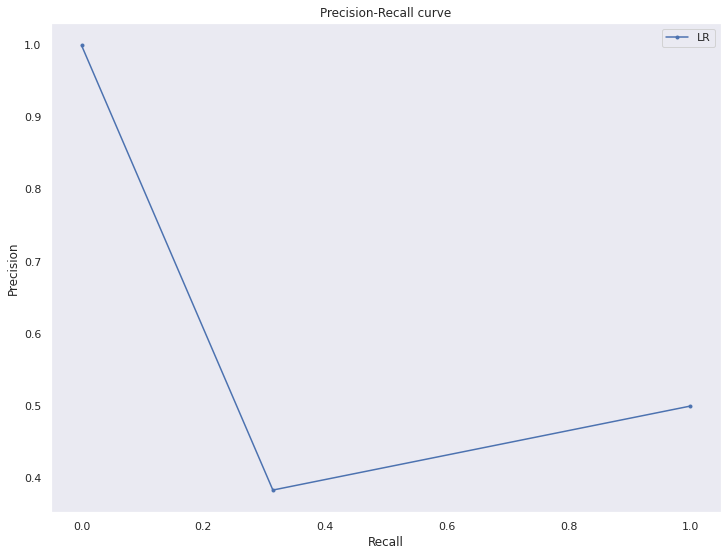

In [185]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')